# Define cylinder structure 

The cylinder is the most challenging base shape we have (cylinder, box and sphere). We can experiment with it and then apply the same algorithm to all the 3d shapes. 

In [1]:
import numpy as np


NUM_CIRCLE_POINTS = 20

"""
# Parameters of a cylinder
radius = 20
height = 40

# Rotation parameters (rad)
roll = np.pi / 6    # rotation around x axis
pitch = -np.pi / 4  # rotation around y axis
yaw = 0             # rotation around z axis

# Translation parameters
offset_x = 0
offset_y = 0
# We won't need offset_z 
"""

radius = 0.021
height = 0.01

roll = 0            # rotation around x axis
pitch = 1.5708      # rotation around y axis
yaw = 0             # rotation around z axis

offset_x = 0.04
offset_y = 0
offset_z = 0.04

# Test shape points

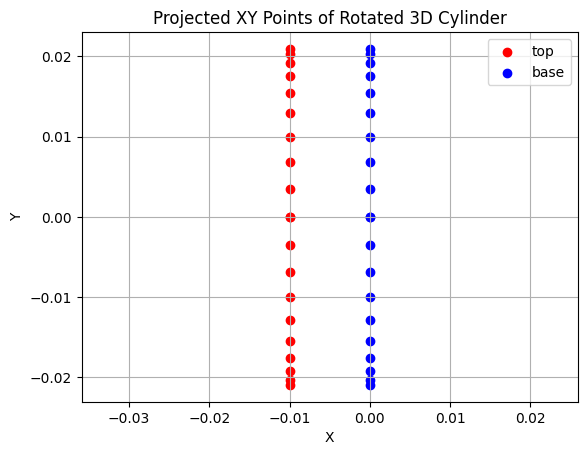

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Define the points
base = np.array([
        [radius * np.cos(angle), radius * np.sin(angle), 0]
        for angle in np.linspace(0, 2 * np.pi, NUM_CIRCLE_POINTS)
    ])
top = np.array([
        [radius * np.cos(angle), radius * np.sin(angle), height]
        for angle in np.linspace(0, 2 * np.pi, NUM_CIRCLE_POINTS)
    ])

# Compute the rotation matrix using Euler angles
rotation_matrix = np.array([
    [np.cos(pitch)*np.cos(yaw), -np.cos(roll)*np.sin(yaw) + np.sin(roll)*np.sin(pitch)*np.cos(yaw), np.sin(roll)*np.sin(yaw) + np.cos(roll)*np.sin(pitch)*np.cos(yaw)],
    [np.cos(pitch)*np.sin(yaw), np.cos(roll)*np.cos(yaw) + np.sin(roll)*np.sin(pitch)*np.sin(yaw), -np.sin(roll)*np.cos(yaw) + np.cos(roll)*np.sin(pitch)*np.sin(yaw)],
    [-np.sin(pitch), np.sin(roll)*np.cos(pitch), np.cos(roll)*np.cos(pitch)]
])

# Rotate the points using the rotation matrix
rotated_points_base = np.dot(base, rotation_matrix)
rotated_points_top = np.dot(top, rotation_matrix)

# Project onto the XY plane
projected_points_base = rotated_points_base[:, :2]
projected_points_top = rotated_points_top[:, :2]

x_base = [point[0] for point in projected_points_base]
y_base = [point[1] for point in projected_points_base]

x_top = [point[0] for point in projected_points_top]
y_top = [point[1] for point in projected_points_top]

# Plot the projected XY points
plt.figure()
plt.scatter(x_top, y_top, color='red', label='top')
plt.scatter(x_base, y_base, color='blue', label='base')
plt.legend()
plt.title("Projected XY Points of Rotated 3D Cylinder")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()


# Test points convex hull

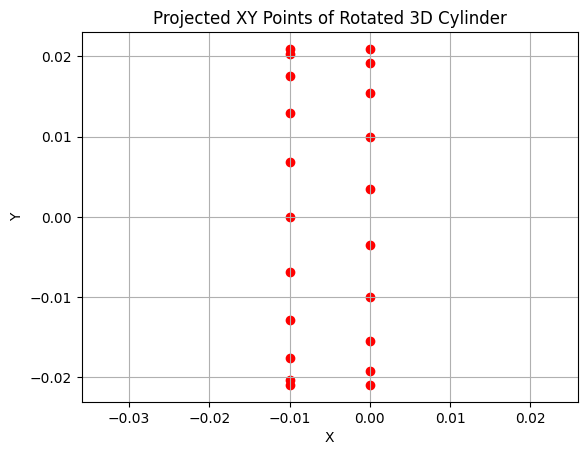

In [3]:
from scipy.spatial import ConvexHull


projected_points = np.concatenate((projected_points_base, projected_points_top))

# Take only the outermost among them
hull = ConvexHull(projected_points)
outermost_points = [projected_points[i] for i in hull.vertices]

x = [point[0] for point in outermost_points]
y = [point[1] for point in outermost_points]

# Plot the projected XY points
plt.figure()
plt.scatter(x, y, color='red')
plt.title("Projected XY Points of Rotated 3D Cylinder")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

# Test merging points

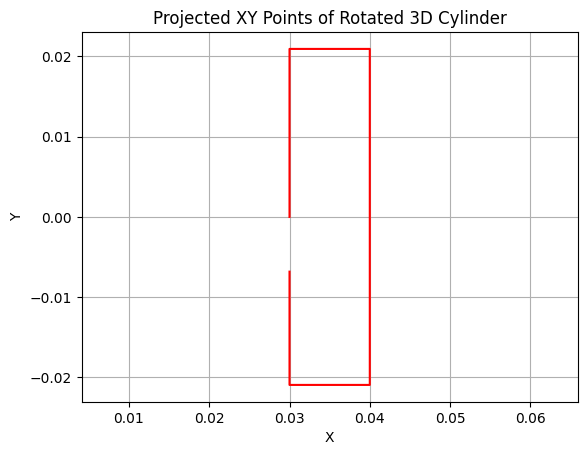

In [4]:
# Assign an angle to each of them (accounting for the center of the polygon)
points_with_angles = []
for point in outermost_points:

    angle = np.arctan2(point[1], point[0])
    points_with_angles.append((point[0], point[1], angle))

# Sort the points based on the angles
points = np.array([[point[0], point[1]] for point in sorted(points_with_angles, key=lambda x: x[2])])

# Apply translation
translated_points = points + np.array([offset_x, offset_y])

x = [point[0] for point in translated_points]
y = [point[1] for point in translated_points]

# Plot the result
plt.figure()
plt.plot(x, y, color='red')
plt.title("Projected XY Points of Rotated 3D Cylinder")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

# Test complete shape projection

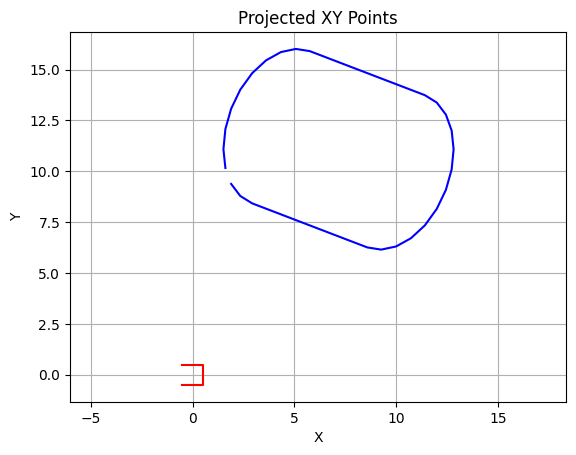

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


NUM_CIRCLE_POINTS = 25

class Sphere:

    def __init__(self, radius, center):
        self.radius = radius
        self.center = center

    def get_projection(self, angles, offsets):
        return np.array(
            [
                [self.radius * np.cos(angle), self.radius * np.sin(angle)]
                for angle in np.linspace(0, 2 * np.pi, NUM_CIRCLE_POINTS)
            ]  # + [self.radius, 0]
        ) + offsets[:2]


class Box:

    def __init__(self, width, length, depth):
        self.width = width
        self.length = length
        self.depth = depth

    def get_projection(self, angles, offsets):
        
        # Define the points
        points = np.array([
            [self.length/2, self.width/2, -self.depth/2],
            [-self.length/2, self.width/2, -self.depth/2],
            [-self.length/2, -self.width/2, -self.depth/2],
            [self.length/2, -self.width/2, -self.depth/2],
            [self.length/2, self.width/2, self.depth/2],
            [-self.length/2, self.width/2, self.depth/2],
            [-self.length/2, -self.width/2, self.depth/2],
            [self.length/2, -self.width/2, self.depth/2]
        ])

        # Define the rotation angles (in radians) along each axis
        roll, pitch, yaw = angles

        # Compute the rotation matrix using Euler angles
        rotation_matrix = np.array([
            [np.cos(pitch)*np.cos(yaw), -np.cos(roll)*np.sin(yaw) + np.sin(roll)*np.sin(pitch)*np.cos(yaw), np.sin(roll)*np.sin(yaw) + np.cos(roll)*np.sin(pitch)*np.cos(yaw)],
            [np.cos(pitch)*np.sin(yaw), np.cos(roll)*np.cos(yaw) + np.sin(roll)*np.sin(pitch)*np.sin(yaw), -np.sin(roll)*np.cos(yaw) + np.cos(roll)*np.sin(pitch)*np.sin(yaw)],
            [-np.sin(pitch), np.sin(roll)*np.cos(pitch), np.cos(roll)*np.cos(pitch)]
        ])

        # Rotate the points using the rotation matrix
        rotated_points = np.dot(points, rotation_matrix)

        # Project onto the XY plane
        projected_points = rotated_points[:, :2]

        # Take only the outermost among them
        hull = ConvexHull(projected_points)
        outermost_points = [projected_points[i] for i in hull.vertices]

        # Assign an angle to each of them (accounting for the center of the polygon)
        points_with_angles = []
        for point in outermost_points:

            angle = np.arctan2(point[1], point[0])
            points_with_angles.append((point[0], point[1], angle))
    
        # Sort the points based on the angles
        points = np.array([[point[0], point[1]] for point in sorted(points_with_angles, key=lambda x: x[2])])

        # Return the ordered points with translation
        return points + np.array([offsets[0], offsets[1]])
    
class Cylinder:

    def __init__(self, radius, height):
        self.radius = radius
        self.height = height

    def get_projection(self, angles, offsets):
        
        # Define the points
        base = np.array(
            [
                [self.radius * np.cos(angle), self.radius * np.sin(angle), 0]
                for angle in np.linspace(0, 2 * np.pi, NUM_CIRCLE_POINTS)
            ]
        )
        points = np.concatenate((base, base))
        points[NUM_CIRCLE_POINTS :, 2] = self.height
        

        # Define the rotation angles (in radians) along each axis
        roll, pitch, yaw = angles

        # Compute the rotation matrix using Euler angles
        rotation_matrix = np.array([
            [np.cos(pitch)*np.cos(yaw), -np.cos(roll)*np.sin(yaw) + np.sin(roll)*np.sin(pitch)*np.cos(yaw), np.sin(roll)*np.sin(yaw) + np.cos(roll)*np.sin(pitch)*np.cos(yaw)],
            [np.cos(pitch)*np.sin(yaw), np.cos(roll)*np.cos(yaw) + np.sin(roll)*np.sin(pitch)*np.sin(yaw), -np.sin(roll)*np.cos(yaw) + np.cos(roll)*np.sin(pitch)*np.sin(yaw)],
            [-np.sin(pitch), np.sin(roll)*np.cos(pitch), np.cos(roll)*np.cos(pitch)]
        ])

        # Rotate the points using the rotation matrix
        rotated_points = np.dot(points, rotation_matrix)

        # Project onto the XY plane
        projected_points = rotated_points[:, :2]

        # Take only the outermost among them
        hull = ConvexHull(projected_points)
        outermost_points = [projected_points[i] for i in hull.vertices]

        # Assign an angle to each of them (accounting for the center of the polygon)
        points_with_angles = []
        for point in outermost_points:

            angle = np.arctan2(point[1], point[0])
            points_with_angles.append((point[0], point[1], angle))
    
        # Sort the points based on the angles
        points = np.array([[point[0], point[1]] for point in sorted(points_with_angles, key=lambda x: x[2])])

        # Return the ordered points with translation
        return points + np.array([offsets[0], offsets[1]])

b = Box(1, 1, 1)
points_1 = b.get_projection((0, 0, 0), (0, 0, 0))
x_1 = [point[0] for point in points_1]
y_1 = [point[1] for point in points_1]

c = Cylinder(4, 8)
points_2 = c.get_projection((np.pi / 8, np.pi / 4, 0), (10, 10, 0))
x_2 = [point[0] for point in points_2]
y_2 = [point[1] for point in points_2]

# Plot the projected XY points
plt.figure()
plt.plot(x_1, y_1, color='red')
plt.plot(x_2, y_2, color='blue')
plt.title("Projected XY Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()


# Multiple tests with different angles

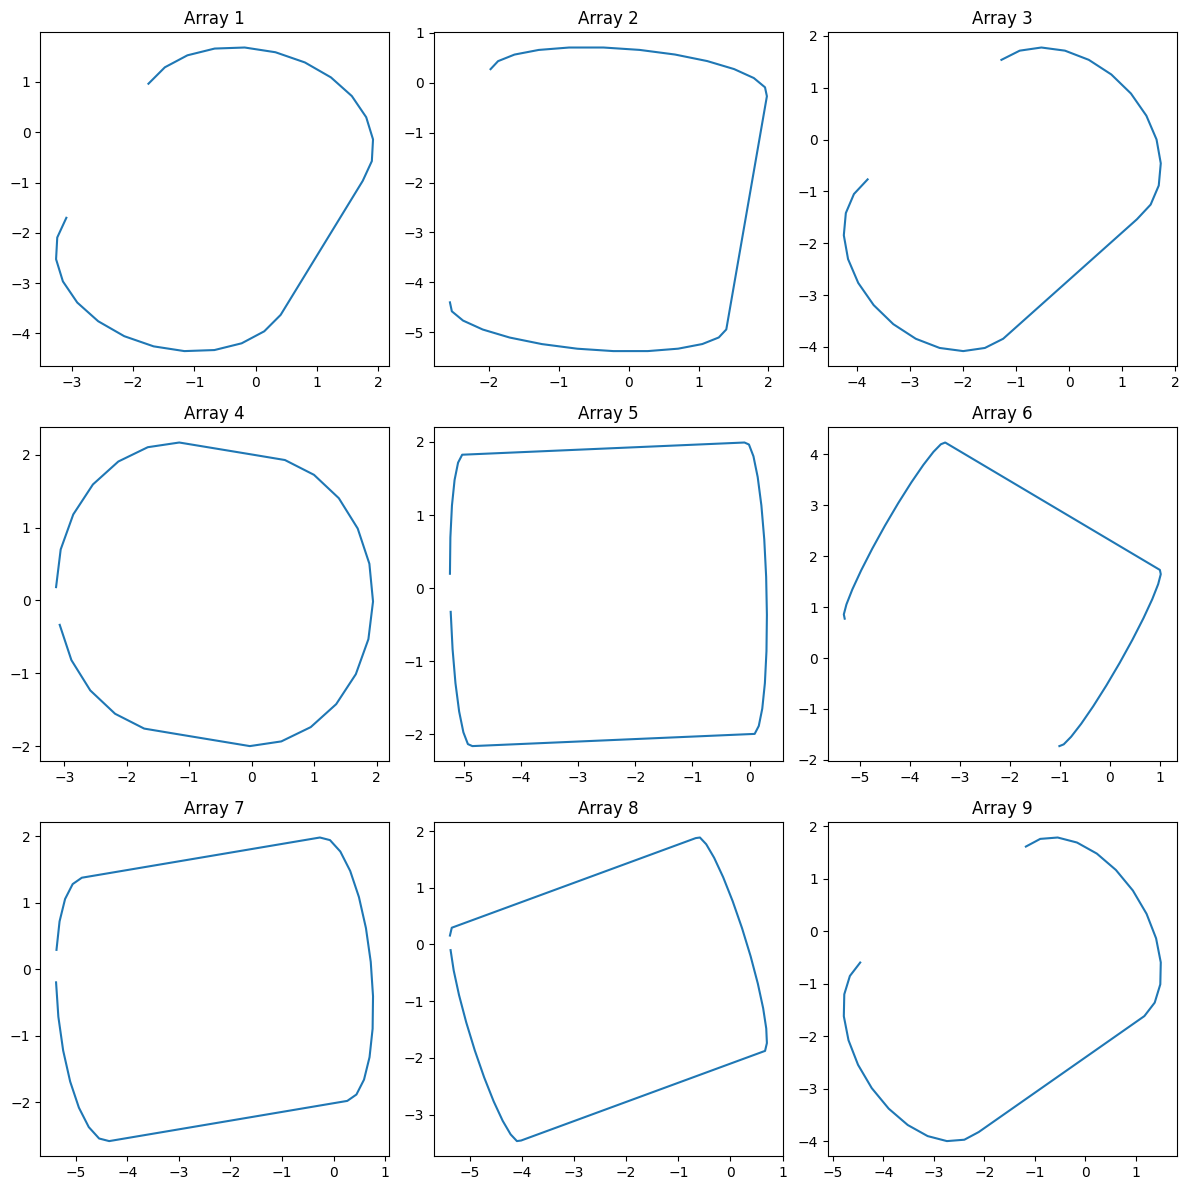

In [6]:
import random

"""
c = Cylinder(2, 5)
points = c.get_projection(
    (
        random.random() * 2 * np.pi,
        random.random() * 2 * np.pi,
        random.random() * 2 * np.pi
    ), 
    (
        0, 
        0, 
        0
    )
)
"""

arrays = [
    Cylinder(2, 5).get_projection(
        (
            random.random() * np.pi,
            random.random() * np.pi,
            random.random() * np.pi
        ), 
        (
            0, 
            0, 
            0
        )
    ) for _ in range(9)
]

# Determine the number of rows and columns in the grid
num_rows = 3
num_cols = len(arrays) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the 2D array of subplots into a 1D array for easy iteration
axes = axes.flatten()

# Iterate through the arrays and plot them in the subplots
for i, data in enumerate(arrays):
    ax = axes[i]
    x = [point[0] for point in data]
    y = [point[1] for point in data]
    ax.plot(x, y)
    ax.set_title(f"Array {i + 1}")

# Remove any empty subplots
for i in range(len(arrays), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()